In [13]:

import pandas as pd
import glob
import matplotlib.pyplot as plt


In [2]:
csv_files=glob.glob('/content/*.csv')
csv_files

['/content/states6.csv',
 '/content/states2.csv',
 '/content/us_census.csv',
 '/content/states7.csv',
 '/content/states1.csv',
 '/content/states0.csv',
 '/content/states8.csv',
 '/content/states5.csv',
 '/content/states4.csv',
 '/content/states3.csv',
 '/content/states9.csv']

In [3]:
us_census=pd.DataFrame()

for file in csv_files:
    data_temp=pd.read_csv(file)
    us_census=pd.concat([us_census, data_temp], ignore_index=True)

us_census.to_csv("us_census.csv", index=False)

In [4]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,New Jersey,8904413,18.74950049950049%,56.488761238761285%,14.387862137862117%,0.11533466533466513%,8.159990009990018%,0.031318681318681325%,$76581.08341708542,4343027M_4561386F
1,1,New Mexico,2084117,45.28293172690762%,40.69799196787147%,1.7550200803212852%,9.248594377510045%,1.23433734939759%,0.04277108433734938%,$47329.96787148595,1032414M_1051703F
2,2,New York,19673174,17.241424747786684%,56.4701050030883%,15.668046119003515%,0.32163887173152117%,7.8971587399629355%,0.023450689726168417%,$64290.74911292006,9541801M_10131373F
3,3,North Carolina,9845333,8.464762782128062%,64.5976508521419%,21.3951174573929%,1.0854905573468434%,2.317457392906495%,0.05232611699677568%,$49937.46413697362,4795408M_5049925F
4,4,North Dakota,721640,2.832682926829267%,87.44829268292683%,1.2843902439024397%,5.651219512195119%,0.9619512195121945%,NaN,$58188.112195121954,367963M_353677F


In [5]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [6]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [7]:
#changing data types
us_census2=us_census
cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in cols:
    us_census2[col] = pd.to_numeric(us_census2[col].str.strip('%'), errors='coerce')
    us_census2[col] = us_census2[col].fillna(us_census2[col].mean())




In [8]:
#for income
us_census2['Income'] = us_census2['Income'].str.replace('$','').astype(float)

<ipython-input-8-663379684263>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census2['Income'] = us_census2['Income'].str.replace('$','').astype(float)


In [9]:
us_census2.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
dtype: object

In [10]:
#splitting GenderPop into male and female columns
us_census2[['Male','Female']] = us_census2.GenderPop.str.split('_', expand=True)


In [11]:
# convert Male, Female columns to numerical data types
us_census2['Male'] = pd.to_numeric(us_census2['Male'].str.replace('[^0-9]', ''))
us_census2['Female'] = pd.to_numeric(us_census2['Female'].str.replace('[^0-9]', ''))

<ipython-input-11-6ee4303be3d8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  us_census2['Male'] = pd.to_numeric(us_census2['Male'].str.replace('[^0-9]', ''))
<ipython-input-11-6ee4303be3d8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  us_census2['Female'] = pd.to_numeric(us_census2['Female'].str.replace('[^0-9]', ''))


In [12]:
us_census2.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,New Jersey,8904413,18.749500,56.488761,14.387862,0.115335,8.159990,0.031319,76581.083417,4343027M_4561386F,4343027,4561386.0
1,1,New Mexico,2084117,45.282932,40.697992,1.755020,9.248594,1.234337,0.042771,47329.967871,1032414M_1051703F,1032414,1051703.0
2,2,New York,19673174,17.241425,56.470105,15.668046,0.321639,7.897159,0.023451,64290.749113,9541801M_10131373F,9541801,10131373.0
3,3,North Carolina,9845333,8.464763,64.597651,21.395117,1.085491,2.317457,0.052326,49937.464137,4795408M_5049925F,4795408,5049925.0
4,4,North Dakota,721640,2.832683,87.448293,1.284390,5.651220,0.961951,0.282927,58188.112195,367963M_353677F,367963,353677.0


In [15]:
us_census2['Female'] = us_census2['Female'].fillna(us_census2['TotalPop'] - us_census2['Male'])


In [18]:
us_census2['Female'].isnull().any()

False

In [19]:
us_census2.duplicated().any()


True

In [20]:
us_census2.drop_duplicates(inplace=True)


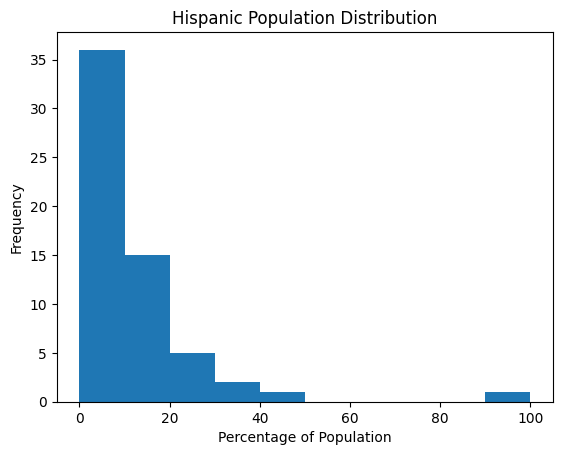

In [21]:
plt.hist(us_census['Hispanic'], bins=10, range=[0, 100])
plt.title('Hispanic Population Distribution')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency')
plt.show()

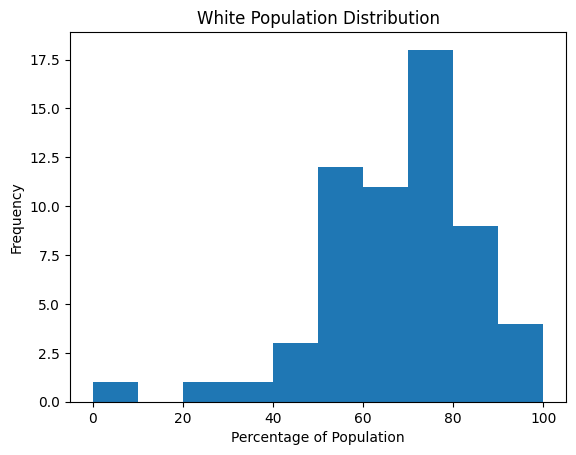

In [22]:
plt.hist(us_census['White'], bins=10, range=[0, 100])
plt.title('White Population Distribution')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency')
plt.show()

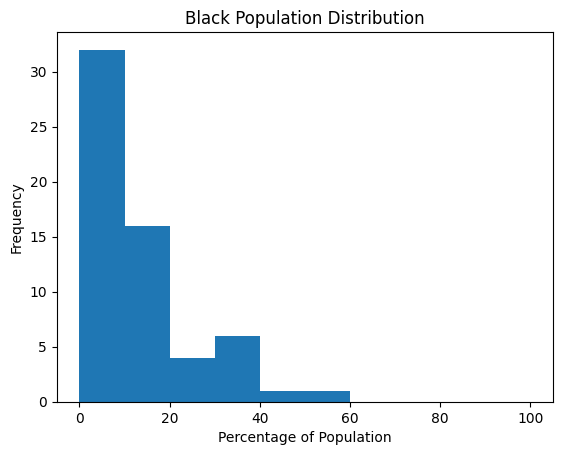

In [23]:
plt.hist(us_census['Black'], bins=10, range=[0, 100])
plt.title('Black Population Distribution')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency')
plt.show()

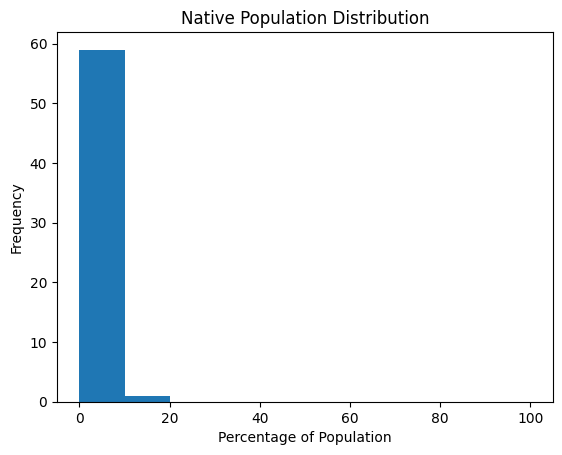

In [24]:
plt.hist(us_census['Native'], bins=10, range=[0, 100])
plt.title('Native Population Distribution')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency')
plt.show()

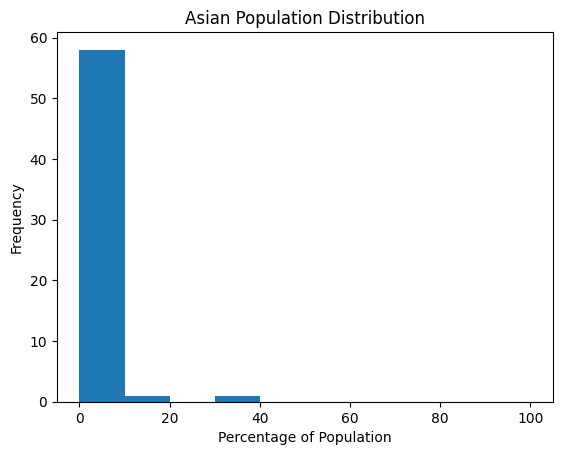

In [25]:
plt.hist(us_census['Asian'], bins=10, range=[0, 100])
plt.title('Asian Population Distribution')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency')
plt.show()

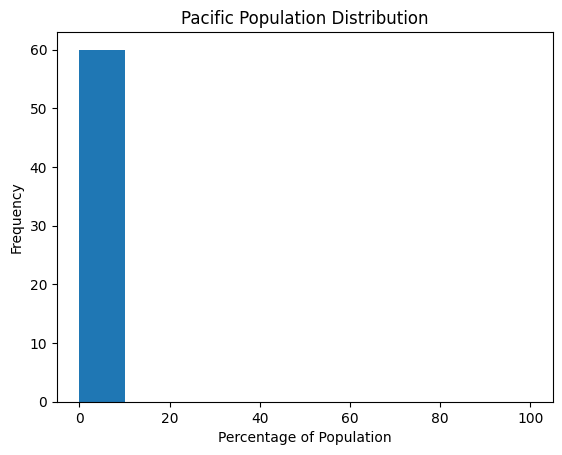

In [26]:
plt.hist(us_census['Pacific'], bins=10, range=[0, 100])
plt.title('Pacific Population Distribution')
plt.xlabel('Percentage of Population')
plt.ylabel('Frequency')
plt.show()